In [1]:
# Imports
from pathlib import Path
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder


---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [2]:
# Import applicants_data.csv to Google Colab
from google.colab import files
uploaded = files.upload()

Saving applicants_data.csv to applicants_data (2).csv


In [3]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv("applicants_data.csv")

# Review the DataFrame
applicant_data_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
applicant_data_df.shape

(34299, 12)

In [5]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [6]:
applicant_data_df.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [7]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=['EIN', 'NAME'])

# Review the DataFrame
applicant_data_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [8]:
applicant_data_df.isnull().sum()

APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [9]:
applicant_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [10]:
# Create a list of categorical variables
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes=="object"].index)

# Display the categorical variables list
categorical_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [12]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
encoded_data

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_data , columns = enc.get_feature_names_out(categorical_variables))

# Review the DataFrame
encoded_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course.

In [15]:
applicant_data_df_numerical=applicant_data_df.drop(columns=categorical_variables)
applicant_data_df_numerical.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL'], dtype='object')

In [16]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df =pd.concat([applicant_data_df_numerical,encoded_df],axis=1)

# Review the DataFrame
encoded_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
encoded_df.shape

(34299, 117)

### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset.



In [18]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df["IS_SUCCESSFUL"]

# Display a sample of y
y[:5]

0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [19]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df.drop(columns="IS_SUCCESSFUL")

# Review the features DataFrame
X.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 6: Split the features and target sets into training and testing datasets.


In [20]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=1)

### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [21]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
X_train_scaled.shape

(27439, 116)

In [23]:
X_test_scaled.shape

(6860, 116)

---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [24]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [25]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [26]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =   (number_input_features + 1) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

58

In [27]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1 + 1) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

29

In [28]:
# Create the Sequential model instance
nn = Sequential()


In [29]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [30]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2,  activation="relu"))

In [31]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1, activation="sigmoid"))

In [32]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 29)                1711      
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8527 (33.31 KB)
Trainable params: 8527 (33.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [33]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
858/858 [==============================] - 3s 2ms/step - loss: 0.5705 - accuracy: 0.7202
Epoch 2/50
858/858 [==============================] - 1s 2ms/step - loss: 0.5515 - accuracy: 0.7304
Epoch 3/50
858/858 [==============================] - 1s 2ms/step - loss: 0.5483 - accuracy: 0.7325
Epoch 4/50
858/858 [==============================] - 1s 2ms/step - loss: 0.5469 - accuracy: 0.7326
Epoch 5/50
858/858 [==============================] - 1s 2ms/step - loss: 0.5451 - accuracy: 0.7328
Epoch 6/50
858/858 [==============================] - 1s 2ms/step - loss: 0.5447 - accuracy: 0.7328
Epoch 7/50
858/858 [==============================] - 1s 2ms/step - loss: 0.5433 - accuracy: 0.7328
Epoch 8/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5422 - accuracy: 0.7346
Epoch 9/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5420 - accuracy: 0.7337
Epoch 10/50
858/858 [==============================] - 1s 2ms/step - loss: 0.5409 - accuracy: 0.7353

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [35]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5609 - accuracy: 0.7280 - 407ms/epoch - 2ms/step
Loss: 0.5609278082847595, Accuracy: 0.7279883623123169


In [36]:
# Create a DataFrame using the model history and an index parameter
model_1_plot = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))
model_1_plot.head()

,loss,accuracy
1,0.570496,0.720179
2,0.551461,0.730420
3,0.548336,0.732498
4,0.546946,0.732570
5,0.545127,0.732826


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`.


In [37]:
# Set the model's file path
file_path = "AlphabetSoup.h5"

# Export your model to a HDF5 file
nn.save(file_path)

# Download your model to your computer
files.download(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [38]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [39]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [40]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = (number_input_features + 1) // 2


# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

58

In [41]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A1 = (hidden_nodes_layer1_A1 + 1) // 2

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A1

29

In [42]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A1 = (hidden_nodes_layer2_A1 + 1) // 2


# Review the number of hidden nodes in the second layer
hidden_nodes_layer3_A1

15

In [43]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [44]:

# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation="relu"))

# second hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer2_A1,  activation="relu"))

# thrird hidden layer

nn_A1.add(Dense(units=hidden_nodes_layer3_A1,  activation="relu"))


# Output layer
nn_A1.add(Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 58)                6786      
                                                                 
 dense_4 (Dense)             (None, 29)                1711      
                                                                 
 dense_5 (Dense)             (None, 15)                450       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 8963 (35.01 KB)
Trainable params: 8963 (35.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
# Compile the Sequential model
nn_A1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [46]:
# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
858/858 [==============================] - 3s 2ms/step - loss: 0.5719 - accuracy: 0.7168
Epoch 2/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5516 - accuracy: 0.7308
Epoch 3/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.7321
Epoch 4/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5460 - accuracy: 0.7342
Epoch 5/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5445 - accuracy: 0.7336
Epoch 6/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5441 - accuracy: 0.7328
Epoch 7/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5425 - accuracy: 0.7356
Epoch 8/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5417 - accuracy: 0.7357
Epoch 9/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5412 - accuracy: 0.7359
Epoch 10/50
858/858 [==============================] - 2s 2ms/step - loss: 0.5409 - accuracy: 0.7371

In [47]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5604 - accuracy: 0.7264 - 379ms/epoch - 2ms/step
Loss: 0.5603752136230469, Accuracy: 0.7263848185539246


In [48]:
# Create a DataFrame using the model history and an index parameter
model_2_plot = pd.DataFrame(fit_model_A1.history, index=range(1, len(fit_model_A1.history["loss"]) + 1))
model_2_plot.head()

,loss,accuracy
1,0.571933,0.716826
2,0.551629,0.730785
3,0.548108,0.732060
4,0.546005,0.734210
5,0.544528,0.733591


#### Alternative Model 2

In [49]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [50]:
# Define the number of neurons in the output layer
number_output_neurons_A2 =1

In [51]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = (number_input_features + 1) // 2  + 5

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

63

In [52]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2 = (hidden_nodes_layer1_A2 + 1) // 2 + 3

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A2

35

In [53]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer3_A2 = (hidden_nodes_layer2_A2 + 1) // 2 + 2

# Review the number of hidden nodes in the second layer
hidden_nodes_layer3_A2

20

In [54]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [55]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features, activation="LeakyReLU"))

# Add second hidden layer with regularization
nn_A2.add(Dense(units=hidden_nodes_layer2_A2,  activation="LeakyReLU"))

# Add third hidden layer

nn_A2.add(Dense(hidden_nodes_layer3_A2, activation='LeakyReLU'))

# Output layer
nn_A2.add(Dense(units=number_output_neurons_A2, activation="sigmoid"))

# Check the structure of the model
nn_A2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 63)                7371      
                                                                 
 dense_8 (Dense)             (None, 35)                2240      
                                                                 
 dense_9 (Dense)             (None, 20)                720       
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 10352 (40.44 KB)
Trainable params: 10352 (40.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# Compile the model
nn_A2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [57]:
# Fit the model
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=50,batch_size=5)

Epoch 1/50
5488/5488 [==============================] - 11s 2ms/step - loss: 0.5694 - accuracy: 0.7231
Epoch 2/50
5488/5488 [==============================] - 10s 2ms/step - loss: 0.5560 - accuracy: 0.7287
Epoch 3/50
5488/5488 [==============================] - 10s 2ms/step - loss: 0.5537 - accuracy: 0.7299
Epoch 4/50
5488/5488 [==============================] - 10s 2ms/step - loss: 0.5504 - accuracy: 0.7316
Epoch 5/50
5488/5488 [==============================] - 11s 2ms/step - loss: 0.5508 - accuracy: 0.7307
Epoch 6/50
5488/5488 [==============================] - 10s 2ms/step - loss: 0.5496 - accuracy: 0.7314
Epoch 7/50
5488/5488 [==============================] - 10s 2ms/step - loss: 0.5484 - accuracy: 0.7320
Epoch 8/50
5488/5488 [==============================] - 10s 2ms/step - loss: 0.5475 - accuracy: 0.7321
Epoch 9/50
5488/5488 [==============================] - 10s 2ms/step - loss: 0.5477 - accuracy: 0.7318
Epoch 10/50
5488/5488 [==============================] - 11s 2ms/step - l

In [58]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5566 - accuracy: 0.7264 - 367ms/epoch - 2ms/step
Loss: 0.5566300749778748, Accuracy: 0.7263848185539246


In [59]:
model_3_plot = pd.DataFrame(fit_model_A2.history, index=range(1, len(fit_model_A2.history["loss"]) + 1))
model_3_plot.head()

,loss,accuracy
1,0.569424,0.723058
2,0.556009,0.728707
3,0.553689,0.729910
4,0.550430,0.731586
5,0.550811,0.730675


#### Alternative Model 3

In [60]:
# Import regularizers
from keras.regularizers import l1, l2

In [61]:

# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [62]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A3 = (number_input_features + 1) // 2 + 5

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A3

63

In [63]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A3 = (hidden_nodes_layer1_A2 + 1) // 2  + 3

# Review the number of hidden nodes in the second layer
hidden_nodes_layer2_A3

35

In [64]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer3_A3 = (hidden_nodes_layer2_A2 + 1) // 2 + 2

# Review the number of hidden nodes in the second layer
hidden_nodes_layer3_A3

20

In [65]:
# Create the Sequential model instance
nn_A3 = Sequential()

In [66]:
# First hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer1_A3, input_dim=number_input_features, activation="relu"))

# Add second hidden layer with regularization
nn_A3.add(Dense(units=hidden_nodes_layer2_A3,  activation="relu"))

# Add third hidden layer

nn_A3.add(Dense(hidden_nodes_layer3_A3, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

# Output layer
nn_A3.add(Dense(units=number_output_neurons_A2, activation="sigmoid"))

# Check the structure of the model
nn_A3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 63)                7371      
                                                                 
 dense_12 (Dense)            (None, 35)                2240      
                                                                 
 dense_13 (Dense)            (None, 20)                720       
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 10352 (40.44 KB)
Trainable params: 10352 (40.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
# Compile the model
nn_A3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [68]:
# Fit the model
fit_model_A3 = nn_A3.fit(X_train_scaled, y_train, validation_split=.10, epochs=50,batch_size=5)

Epoch 1/50
4939/4939 [==============================] - 12s 2ms/step - loss: 0.5953 - accuracy: 0.7217 - val_loss: 0.5570 - val_accuracy: 0.7336
Epoch 2/50
4939/4939 [==============================] - 10s 2ms/step - loss: 0.5583 - accuracy: 0.7293 - val_loss: 0.5461 - val_accuracy: 0.7376
Epoch 3/50
4939/4939 [==============================] - 10s 2ms/step - loss: 0.5533 - accuracy: 0.7303 - val_loss: 0.5520 - val_accuracy: 0.7354
Epoch 4/50
4939/4939 [==============================] - 10s 2ms/step - loss: 0.5514 - accuracy: 0.7303 - val_loss: 0.5415 - val_accuracy: 0.7391
Epoch 5/50
4939/4939 [==============================] - 10s 2ms/step - loss: 0.5503 - accuracy: 0.7328 - val_loss: 0.5414 - val_accuracy: 0.7453
Epoch 6/50
4939/4939 [==============================] - 10s 2ms/step - loss: 0.5478 - accuracy: 0.7344 - val_loss: 0.5391 - val_accuracy: 0.7416
Epoch 7/50
4939/4939 [==============================] - 10s 2ms/step - loss: 0.5470 - accuracy: 0.7333 - val_loss: 0.5446 - val_ac

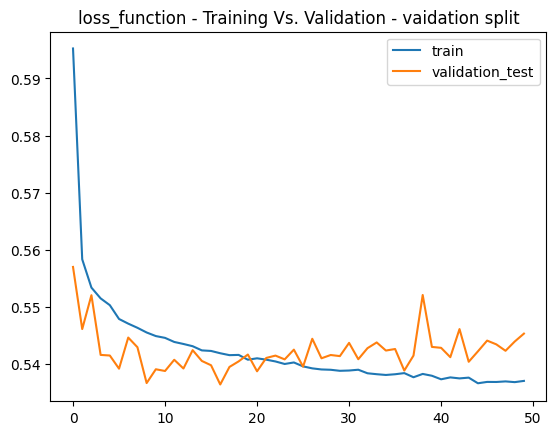

In [69]:
import matplotlib.pyplot as plt
plt.plot(fit_model_A3.history["loss"])
plt.plot(fit_model_A3.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - vaidation split")
plt.legend(["train", "validation_test"])
plt.show()


In [70]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A3.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5541 - accuracy: 0.7287 - 272ms/epoch - 1ms/step
Loss: 0.5540729761123657, Accuracy: 0.7287172079086304


In [71]:
model_4_plot = pd.DataFrame(fit_model_A3.history, index=range(1, len(fit_model_A3.history["loss"]) + 1))
model_4_plot.head()

,loss,accuracy,val_loss,val_accuracy
1,0.595259,0.721725,0.556962,0.733601
2,0.558296,0.729297,0.546071,0.737609
3,0.553338,0.730310,0.552008,0.735423
4,0.551449,0.730269,0.541539,0.739067
5,0.550259,0.732780,0.541435,0.745262


### Comparison Plots For All Models

<Axes: title={'center': 'Loss comparison for models'}>

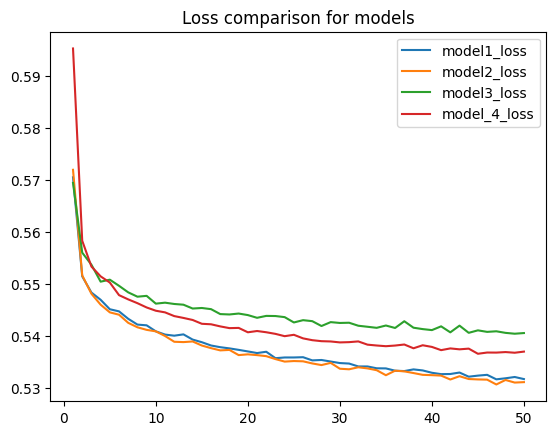

In [72]:
# Loss chart
combined_df1=pd.concat([model_1_plot,model_2_plot,model_3_plot,model_4_plot],axis=1)
columns=["model1_loss","model1_accuracy","model2_loss","model2_accuracy","model3_loss","model3_accuracy","model_4_loss","model_4_accuracy","model_4_val_loss","model_4_val_acc"]
combined_df1.columns=columns
combined_df1.plot(y=["model1_loss","model2_loss","model3_loss","model_4_loss"],title="Loss comparison for models")

<Axes: title={'center': 'Accuracy Comparison For  Models'}>

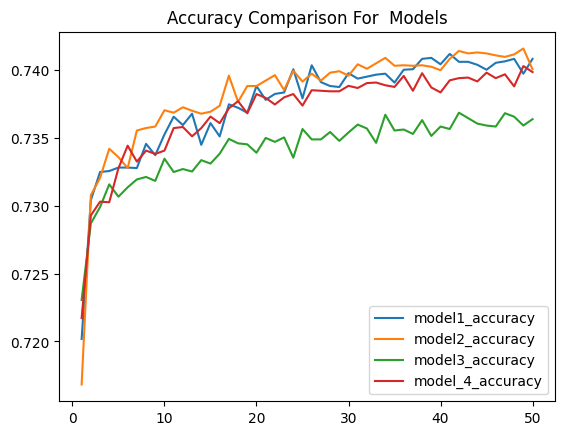

In [73]:
# Accuracy Chart
combined_df1.plot(y=["model1_accuracy","model2_accuracy","model3_accuracy","model_4_accuracy"],title="Accuracy Comparison For  Models")

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [74]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
215/215 - 0s - loss: 0.5609 - accuracy: 0.7280 - 274ms/epoch - 1ms/step
Loss: 0.5609278082847595, Accuracy: 0.7279883623123169


In [75]:
print("Alternative Model 1 Results, Adding a third layer")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results, Adding a third layer
215/215 - 0s - loss: 0.5604 - accuracy: 0.7264 - 284ms/epoch - 1ms/step
Loss: 0.5603752136230469, Accuracy: 0.7263848185539246


In [76]:
print("Alternative Model 2 Results, LeakyReLU and increased neurons")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results, LeakyReLU and increased neurons
215/215 - 0s - loss: 0.5566 - accuracy: 0.7264 - 273ms/epoch - 1ms/step
Loss: 0.5566300749778748, Accuracy: 0.7263848185539246


In [77]:
print("Alternative Model 3 Results, with a regulizer")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A3.evaluate(X_test_scaled,y_test,verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 3 Results, with a regulizer
215/215 - 0s - loss: 0.5541 - accuracy: 0.7287 - 288ms/epoch - 1ms/step
Loss: 0.5540729761123657, Accuracy: 0.7287172079086304


### Step 3: Save each of your alternative models as an HDF5 file.


In [78]:
# Set the file path for the first alternative model
file_path = "AlphabetSoup_A1.h5"

# Export your model to a HDF5 file
nn_A1.save(file_path)

# Download the model to your computer
files.download(file_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
# Set the file path for the second alternative model
file_path = "AlphabetSoup_A2.h5"

# Export your model to a HDF5 file
nn_A2.save(file_path)

# Download the model to your computer
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
# Set the file path for the second alternative model
file_path = "AlphabetSoup_A2.h5"

# Export your model to a HDF5 file
nn_A3.save(file_path)

# Download the model to your computer
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>